# Nearest Neighbor

__This material is heavily based on the popular Standford CS231n lecture material__. [Please check on their website for more detailed information](https://cs231n.github.io/).

## Required Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size": 10,
})

from utils import *

## Class KNearestNeighbor

Implementation of the __naive version__ of the algorithm: compute the distances from the test dataset to all stored training dataset.

In [2]:
from utils import * 

class KNearestNeighbor():
    def train(self, X, y):
        """
        - X: A 2D numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A 1D numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """        
        
        self.X_train = X
        self.y_train = y

        self.num_train = X.shape[0]

    
    def predict(self, X, k=1, L=2):
        """
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - L: Determines how the distances are measured (L=1 means L1-norm and L=2 
             means L2-norm).

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """

        num_test = X.shape[0]
        dists = compute_distances(self.X_train, X, L=L)
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
           
        for i in range(num_test):
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            v, n = np.unique(closest_y, return_counts=True)
            y_pred[i] = v[np.argmax(n)]
    
        return y_pred

## Breast Cancer Wisconsin

We are going to use the breast cancer dataset that has been made publicly available.

The dataset was downloaded from [this link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[This dataset is also available as one of scikit-learn example datasets](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
).

In [3]:
data = np.loadtxt("./datasets/breast_cancer/wdbc.data", delimiter=",", dtype=str)
X = np.float32(data[:, 2:])  # 30 dimensions
y = data[:, 1]               # Diagnosis (M = malignant, B = benign)

print("Dimension numbers :", X.shape[1])
print("Number of data    :", X.shape[0])
print("Labels            :", np.unique(y))

Dimension numbers : 30
Number of data    : 569
Labels            : ['B' 'M']


Split the data:
* 70% for training
* 30% for testing

In [4]:
X_train = X[0:400, :]
y_train = y[0:400]
X_test  = X[401:, :]
y_test   = y[401:]

num_test = X_test.shape[0]

### Train the Classifier

In [5]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=5, L=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / float(num_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 87 / 168 correct => accuracy: 0.517857


### Cross Validations


Here, we perform `k`-fold cross validation to find the best value of `k`. 
- For each possible value of `k`, run the k-nearest-neighbor algorithm `num_folds` times.  
- In each run, use all but one of the folds as training data. The unused fold is used as a validation set. 
- Store the accuracies for all fold and all values of `k` in the `k_to_accuracies` dictionary.       

`k_to_accuracies[k]` should be a list of length `num_folds` giving the different
accuracy values that we found when using that value of `k`.

In [6]:
num_folds = 8
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Split up the training data into folds
X_train_folds = np.array_split(X, num_folds)
y_train_folds = np.array_split(y, num_folds)

# Perform k-fold cross validation to find the best value of k. For each        
k_to_accuracies = {}

for k in tqdm(k_choices):
    k_to_accuracies[k] = []

    for i in range(num_folds):
        N = np.arange(num_folds)
        N = np.delete(N, i)
        X_train_temp = np.vstack([X_train_folds[j] for j in N])
        y_train_temp = np.hstack([y_train_folds[j] for j in N])

        # Train the classifier based on the training data
        classifier.train(X_train_temp, y_train_temp)

        # Predict using the remaining fold representing validation data
        y_pred_temp = classifier.predict(X_train_folds[i], k=k, L=1)

        # Compute the accuracy of the predicted label
        num_correct = np.sum(y_pred_temp == y_train_folds[i])
        k_to_accuracies[k].append(num_correct / len(y_pred_temp))

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    accuracy = k_to_accuracies[k]
    print('k = %d, average accuracy = %f, std accuracy = %f' % (k, np.mean(accuracy), np.std(accuracy)))


  0%|          | 0/15 [00:00<?, ?it/s]

k = 1, average accuracy = 0.411067, std accuracy = 0.083290
k = 2, average accuracy = 0.490488, std accuracy = 0.060937
k = 3, average accuracy = 0.379524, std accuracy = 0.105952
k = 4, average accuracy = 0.402680, std accuracy = 0.086928
k = 5, average accuracy = 0.355022, std accuracy = 0.087927
k = 6, average accuracy = 0.381529, std accuracy = 0.083995
k = 7, average accuracy = 0.349839, std accuracy = 0.092521
k = 8, average accuracy = 0.367493, std accuracy = 0.081321
k = 9, average accuracy = 0.337490, std accuracy = 0.093599
k = 10, average accuracy = 0.348127, std accuracy = 0.093505
k = 11, average accuracy = 0.346293, std accuracy = 0.098788
k = 12, average accuracy = 0.348078, std accuracy = 0.095754
k = 13, average accuracy = 0.330350, std accuracy = 0.095045
k = 14, average accuracy = 0.328687, std accuracy = 0.094060
k = 15, average accuracy = 0.332086, std accuracy = 0.099775


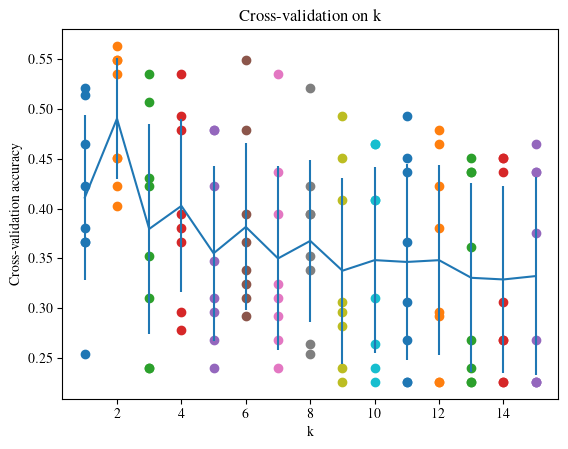

In [7]:
# Plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

### The Best Value for `k`

Based on the cross-validation results above:
- choose the best value for k.   
- retrain the classifier using all the training data
- test it on the test data

In [8]:
best_k = k_choices[accuracies_mean.argmax()]
print('Best value for k: ', best_k)

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k, L=1)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test

print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Best value for k:  2
Got 113 / 168 correct => accuracy: 0.672619
